In [35]:
# Initial imports
import pandas as pd
from pathlib import Path

In [23]:
# Data loading
file_path = Path("Instructions/crypto_data.csv")
df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [24]:
# List dataframe data types
df_crypto.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [25]:
# Drop Cryptocurrencies that are not being traded
df_crypto = df_crypto[df_crypto.IsTrading != False]

# Drop the 'IsTrading' column now that we kept only the crypto that's being traded
df_crypto = df_crypto.drop(columns=['IsTrading'])
len(df_crypto)

1144

In [26]:
# Drop null values from the dataframe
df_crypto = df_crypto.dropna()
len(df_crypto)

685

In [27]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric.
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
df_crypto = df_crypto.drop(columns=['CoinName'])
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [28]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data.
# To accomplish this task, use Pandas to create dummy variables.
df_crypto_dummies = pd.get_dummies(df_crypto[['Algorithm','ProofType']], drop_first=True)
df_crypto_dummies.head()

,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Standarize the dataset with StandardScaler
from sklearn.preprocessing import StandardScaler
df_crypto_dummies_scaled = StandardScaler().fit_transform(df_crypto_dummies)
print(df_crypto_dummies_scaled)

[[-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 ...
 [-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.03823596 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]]


In [30]:
# Applying PCA to reduce dimensions to 99%
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get 99% of the principal components for the scaled data.
crypto_pca = pca.fit_transform(df_crypto_dummies_scaled)
crypto_pca

array([[ 1.16761926e+00, -5.31786328e-01, -1.09011666e-13, ...,
        -4.77862362e-16, -2.02965840e-15, -1.22259119e-15],
       [ 1.16761926e+00, -5.31786328e-01, -1.09223359e-13, ...,
         4.39239075e-17, -2.32328806e-15, -2.25214834e-15],
       [ 7.87366024e-01, -3.27664132e-01, -6.65894047e-14, ...,
        -1.01454251e-14, -1.46603543e-14,  8.83745117e-15],
       ...,
       [-2.30859357e+00,  3.27002461e-01,  5.90805988e-14, ...,
        -4.67376734e-14, -9.11787550e-14,  5.04756035e-14],
       [-2.04253276e+00,  2.90663811e-01,  5.77075220e-14, ...,
        -1.27772859e-15, -3.95577362e-15,  1.54312582e-15],
       [ 7.64215241e-01, -2.18609881e-01, -4.35603102e-14, ...,
         2.24388021e-15,  9.07225534e-16, -4.66039207e-15]])

In [31]:
# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

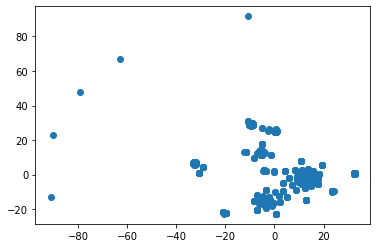

In [32]:
# Plot the results
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [33]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Ruby\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,64907.862084
1,2,63535.087116
2,3,62162.309888
3,4,61480.660064
4,5,60313.113710


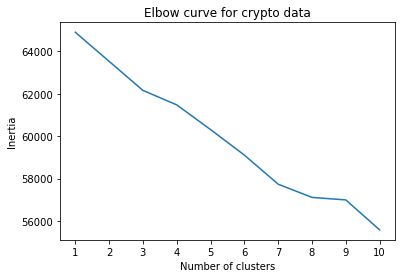

In [34]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()